In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

df_matches = pd.read_csv("matches.csv")
df_matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [2]:
df_deliveries = pd.read_csv("deliveries.csv")
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [3]:
print(df_matches.shape)
print(df_deliveries.shape)

(756, 18)
(179078, 21)




*   In matches data frame columns like umpire1,umpire2,umpire3 are not useful because these days they are using technology. So we cant decide which umpire is more useful for predicting anything related to match.
*   Date is also not useful because we already have season column which is also almost equal to date.


*   City and venue also not important features for this year IPL. Because IPL2020 is happening in UAE, only 2014 ipl was happened in UAE that to half season. But i am removing only venue it almost equal to city feature.
*   'Result' feature is almost equal to 'winner' feature. So i am dropping result column also.





In [4]:
df_matches = df_matches.drop(['venue','date','result','umpire1','umpire2','umpire3'], axis = 1) 
df_matches.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,35,0,Yuvraj Singh
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,0,Rising Pune Supergiant,0,7,SPD Smith


In [5]:
print(df_matches["team1"].value_counts())

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64


In [6]:
#In 2019 delhi daredevils name changed to delhi capitals. So i am replacing old name with new name for all the rows.
df_matches = df_matches.replace(to_replace ="Delhi Daredevils", value = "Delhi Capitals") 

df_deliveries = df_deliveries.replace(to_replace = "Delhi Daredevils", value = "Delhi Capitals")

#Rising pune supergiants name also printed in two ways. Lets change it to Rising pune supergiants.
df_matches = df_matches.replace(to_replace ="Rising Pune Supergiant", value = "Rising Pune Supergiants") 

df_deliveries = df_deliveries.replace(to_replace = "Rising Pune Supergiant", value = "Rising Pune Supergiants")

In [7]:
#checking null values in matches dataset
print(df_matches.isnull().sum())

id                 0
season             0
city               7
team1              0
team2              0
toss_winner        0
toss_decision      0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
dtype: int64


In [8]:
#printing null rows in matches dataset
df1_null = df_matches[df_matches.isna().any(axis=1)]
df1_null.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
300,301,2011,Delhi,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,0,NaN,0,0,NaN
461,462,2014,NaN,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Royal Challengers Bangalore,0,7,PA Patel


In [9]:
#After seeing above table we can clearly understood that 4 matches are not played beacuse of rain, badlight or pitch condition. 
#So i am replacing those null values in winner column with no result and palyer of the match column null values with not declared.
df_matches["winner"].fillna("No result", inplace = True)
df_matches['player_of_match'].fillna("Not declared", inplace = True)
#city column also has 7 null values. I checked those matches data in Espn website and they played in Dubai.
df_matches["city"].fillna("Dubai", inplace = True)
print(df_matches.shape)

(756, 12)


In [10]:
#checking null values in deliveries dataset
print(df_deliveries.isnull().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64




*   Player_dismissed, dismissal_kind and fielder features are having null values. But if you consider today questions only 'player_dismissed' and 'dismissal_kind' features are useful for today analysis. So i am removing "fielder" feature.
*   Filling player_dismissed null values with 'No wicket', dismissal_Kind null values with also No Wicket.



In [11]:
#dropping fielder column
df_deliveries = df_deliveries.drop(['fielder'], axis = 1) 
#filling null values
df_deliveries["player_dismissed"].fillna("No Wicket", inplace = True)
df_deliveries["dismissal_kind"].fillna("No Wicket", inplace = True)
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket,No Wicket
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket,No Wicket


In [12]:
# list of dtypes to include 
include =['float', 'int']
desc = df_deliveries.describe(include = include)
desc

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000




*   I think there are no outliers present in overs column but in balls column balls range is between(0-9), it happens if bowlers balls extra deliveries.
*   In innings column maximum value is 5 so there are some outliers presented. Because there are 2 innings per match, if match tied then they will conduct one super over till last season. So maximum number of innings is 4.


*   And in remaining columns max value is in certain limit only. So i can say there are not much outliers.






### Q1) Who will win today match SRH vs MI?

In [28]:
#First Lets see head-head results
df_SRH_MI = df_matches[((df_matches['team1'] == 'Sunrisers Hyderabad') | (df_matches['team1'] == 'Mumbai Indians')) & 
                        ((df_matches['team2'] == 'Sunrisers Hyderabad') | (df_matches['team2'] == 'Mumbai Indians'))] 

#plotting SRH and MI wins against each other
import plotly.graph_objs as go
df_winner = df_SRH_MI[['id','winner']].groupby('winner').size().reset_index()
df_winner.columns = ['winner','total_wins']
df_winner = df_winner.sort_values('total_wins',ascending=False)[:2]

data = go.Bar(x = df_winner['winner'],y = df_winner['total_wins'])
layout = go.Layout(title = 'Number of wins by SRH and MI against each other',xaxis = dict(title = 'Team'),yaxis = dict(title = 'No of wins'))
fig = go.Figure(data = data,layout = layout)
fig.show()

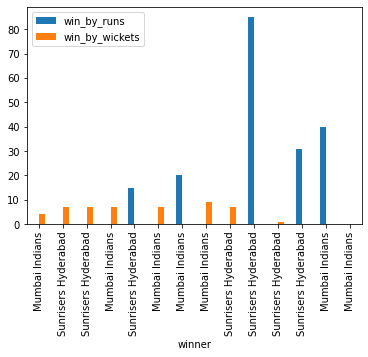

In [29]:
#Lets look at how each tean won the matches i.e weather batting first or bowling first
import matplotlib.pyplot as plt
df_SRH_MI = df_SRH_MI[['win_by_runs','win_by_wickets','winner']]
df_SRH_MI.plot( "winner", kind="bar")

In [30]:
#Lets look at how many player of the match awards won by current MI and SRH players.
#Note: I am taking top 7 palyers from both teams not taking rohit because he is not played in last match. I think this match also he will take rest.
#Sometimes team win dependent on Number of match winners in your team. i.e why i am using this approach.
#Note: I am taking these player names because these players are played atleast one match for their respective sides in this season till now.
df_man_of_match_MI = df_matches[(df_matches['player_of_match'] == 'AS Yadav') | (df_matches['player_of_match'] == 'Q de Kock') |
                                (df_matches['player_of_match'] == 'HH Pandya') | (df_matches['player_of_match'] == 'KA Pollard	') |
                                (df_matches['player_of_match'] == 'JJ Bumrah') | (df_matches['player_of_match'] == 'TA Boult') |
                                (df_matches['player_of_match'] == 'RD Chahar') ]


print("Total number of man of matches won by present Mumbai players is", df_man_of_match_MI.shape[0],"\n") 

df_man_of_match_SRH = df_matches[(df_matches['player_of_match'] == 'DA Warner') | (df_matches['player_of_match'] == 'WP Saha') |
                                (df_matches['player_of_match'] == 'MK Pandey') | (df_matches['player_of_match'] == 'Rashid Khan') |
                                (df_matches['player_of_match'] == 'S Sharma') | (df_matches['player_of_match'] == 'S Nadeem') |
                                (df_matches['player_of_match'] == 'JO Holder') ]

print("Total number of man of matches won by SRH players is", df_man_of_match_SRH.shape[0])

Total number of man of matches won by present Mumbai players is 15 

Total number of man of matches won by SRH players is 32


**Conclusion :-**



*   Mumbai and SRH played 14 matches out of 14 both of them won 7 each. SRH won 7 matches straight forward and MI won 1 match out of 7 matches they won through super over.
*   But SRH has more match winners or experienced players in their team than MI especially rohit also not playing for MI any match this year IPL. So i am predicting SRH will win today match.



### Q2) Which batsman will have highest Stamina Score in today match?

Stamina Score = ((no.of runs 1s2s3s/no.of boundary runs) + (balls played/balls they were in the crease))/Total runs scored by the batsman

In [13]:
df_batsman = df_deliveries[(df_deliveries['batsman'] == 'Q de Kock') | (df_deliveries['batsman'] == 'AS Yadav') |
                           (df_deliveries['batsman'] == 'KA Pollard') | (df_deliveries['batsman'] == 'Ishan Kishan') |
                           (df_deliveries['batsman'] == 'HH Pandya') | (df_deliveries['batsman'] == 'KH Pandya') |
                           (df_deliveries['batsman'] == 'DA Warner') | (df_deliveries['batsman'] == 'WP Saha') |
                           (df_deliveries['batsman'] == 'KS Williamson') | (df_deliveries['batsman'] == 'MK Pandey')]

#Calculating number runs scored by above batsman in each match they played
df_runs_scored = df_batsman.groupby(['match_id','batsman'],as_index=False)['batsman_runs'].sum()  
df_runs_scored.rename(columns={'batsman_runs':'total_runs_scored'},inplace=True)

#Calculating no.of runs scored through 1s,2s,3s 
df_1s2s3s = df_batsman[(df_batsman['batsman_runs'] >=1) & (df_batsman['batsman_runs'] <=3)]
df_1s2s3s = df_1s2s3s.groupby(['match_id','batsman'],as_index=False)['batsman_runs'].sum()
df_1s2s3s.rename(columns={'batsman_runs':'1s2s3s_runs'},inplace=True)

#Calculating no.of boundary runs
df_boundaries = df_batsman[(df_batsman['batsman_runs'] == 4) | (df_batsman['batsman_runs'] == 6)]
df_boundaries = df_boundaries.groupby(['match_id','batsman'],as_index=False)['batsman_runs'].sum()
df_boundaries.rename(columns={'batsman_runs':'bounadry_runs'},inplace=True)

#Calculating no.of balls faced by batsman, wides are not comes under batsman balls faced list.
df_balls_played = df_batsman[(df_batsman['wide_runs'] == 0)]
df_balls_played = df_balls_played.groupby(['match_id','batsman'],as_index=False)['ball'].count()
df_balls_played.rename(columns={'ball':'balls_faced'},inplace=True)

#Calculating balls count when batsman was non-striker. 
#So after that i can sum striker balls and non-striker balls to get no.of balls batsman in the crease
df_non_striker = df_deliveries[(df_deliveries['non_striker'] == 'Q de Kock') | (df_deliveries['non_striker'] == 'AS Yadav') |
                               (df_deliveries['non_striker'] == 'KA Pollard') | (df_deliveries['non_striker'] == 'Ishan Kishan') |
                               (df_deliveries['non_striker'] == 'HH Pandya') | (df_deliveries['non_striker'] == 'KH Pandya') |
                               (df_deliveries['non_striker'] == 'DA Warner') | (df_deliveries['non_striker'] == 'WP Saha') |
                               (df_deliveries['non_striker'] == 'KS Williamson') | (df_deliveries['non_striker'] == 'MK Pandey')]

df_non_striker = df_non_striker.groupby(['match_id','non_striker'],as_index=False)['ball'].count()
df_crease = pd.merge(df_balls_played, df_non_striker, how= 'outer', left_on=['match_id','batsman'],right_on=['match_id','non_striker'])
df_crease.fillna(0, inplace=True)

df_crease['balls_in_crease'] = df_crease['balls_faced'] + df_crease['ball']
df_crease = df_crease[['match_id','batsman','non_striker','balls_in_crease']]


In [14]:
from functools import reduce
#Now merging all above dataframes
df_all = [df_runs_scored,df_1s2s3s,df_boundaries,df_balls_played,df_crease]
df_stamina_score = reduce(lambda  left,right: pd.merge(left,right,on=['match_id','batsman'],how='outer'), df_all)
df_stamina_score.fillna(0,inplace=True)

#In question we want to calculate stamina score for batsman who scored more than 15 runs
df_stamina_score = df_stamina_score[df_stamina_score['total_runs_scored'] > 15]

#Now calculating stamina score of each batsman in each match
#One thing we can observe is that for some batsman we are getting infinite stamina score when batsman not scored any boundary runs or total runs = 0.
#i.e i am adding small noise(+1) to boundary runs and total runs
df_stamina_score['stamina_score'] = ((df_stamina_score['1s2s3s_runs']/(df_stamina_score['bounadry_runs']+1)) + (df_stamina_score['balls_faced']/df_stamina_score['balls_in_crease']))/(df_stamina_score['total_runs_scored']+1)
df_stamina_score.head()


,match_id,batsman,total_runs_scored,1s2s3s_runs,bounadry_runs,balls_faced,non_striker,balls_in_crease,stamina_score
1,2,HH Pandya,35.0,7.0,28.0,15.0,HH Pandya,27.0,0.022137
2,2,KA Pollard,27.0,9.0,18.0,17.0,KA Pollard,31.0,0.036503
5,6,DA Warner,76.0,28.0,48.0,45.0,DA Warner,94.0,0.013638
6,7,HH Pandya,29.0,5.0,24.0,11.0,HH Pandya,23.0,0.022609
7,7,KA Pollard,17.0,7.0,10.0,17.0,KA Pollard,24.0,0.074705


In [15]:
#Now i am taking central tendency of each batsman
df_stamina_score = df_stamina_score.groupby('batsman',as_index=False)['stamina_score'].median() 

#Now normalising stamina scores of each batsman
df_stamina_score['normalized_SS'] = (df_stamina_score['stamina_score'] - df_stamina_score['stamina_score'].min())/(df_stamina_score['stamina_score'].max()-df_stamina_score['stamina_score'].min()) 
df_stamina_score.head(10)

,batsman,stamina_score,normalized_SS
0,AS Yadav,0.026591,0.255617
1,DA Warner,0.021519,0.000000
2,HH Pandya,0.027651,0.309085
3,Ishan Kishan,0.029744,0.414552
4,KA Pollard,0.036185,0.739227
5,KH Pandya,0.037926,0.826965
6,KS Williamson,0.032461,0.551502
7,MK Pandey,0.041359,1.000000
8,Q de Kock,0.025600,0.205681
9,WP Saha,0.038748,0.868394


**Conclusion :-**



*   From above stamina_score column i can say that Manish pandey has highest stamina score followed by Wridhiman Saha and Krunal pandya.
*   I understood why wridhiman saha has highest stamina score because he used to score lot of runs through 1s,2s and 3s and manish also very good runner between wickets. 

So i am predicting either saha,manish or pandya has highest stsmina score in today match. Saha and pandya are in same option, so i am choosing that option.



### Q3) Which batsman will have highest smash rate in today match?

Smash rate = (no.of boundaries scored by batsman / no.of balls faced by batsman)*100

In [16]:
#Taking same batsman which are taken in Q2.
#First claculating number of boundaries they scored in each match
df_no_of_boundaries = df_batsman[(df_batsman['batsman_runs'] == 4) | (df_batsman['batsman_runs'] == 6)]
df_no_of_boundaries = df_no_of_boundaries.groupby(['match_id','batsman'],as_index=False)['batsman_runs'].count()
df_no_of_boundaries.rename(columns={'batsman_runs':'no_of_boundaries'},inplace=True)

#We already calculated number of balls faced by batsman in Q2.
#Now merging balls, runs dataframes
df_smash_rate = pd.merge(df_balls_played, df_no_of_boundaries, how= 'left', left_on=['match_id','batsman'],right_on=['match_id','batsman'])
df_smash_rate['no_of_boundaries'].fillna(0, inplace=True) 

df_smash_rate['smash_rate'] = (df_smash_rate['no_of_boundaries'] / df_smash_rate['balls_faced'])*100
df_smash_rate.head()

,match_id,batsman,balls_faced,no_of_boundaries,smash_rate
0,1,DA Warner,8,3.0,37.500000
1,2,HH Pandya,15,5.0,33.333333
2,2,KA Pollard,17,4.0,23.529412
3,2,KH Pandya,5,0.0,0.000000
4,4,WP Saha,9,3.0,33.333333


Text(0, 0.5, 'Density')

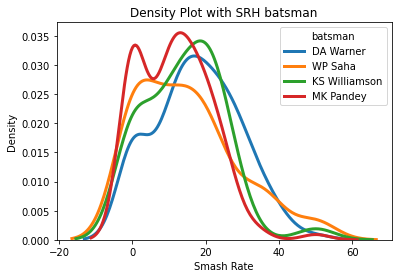

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of 4 SRH batsman who are playing today
SRH_batsman = ['DA Warner', 'WP Saha','KS Williamson', 'MK Pandey']

# Iterate through the 4 SRH batsman
for batsman in SRH_batsman:
    # Subset to the batsman
    subset = df_smash_rate[df_smash_rate['batsman'] == batsman]
    
    # Draw the density plot
    sns.distplot(subset['smash_rate'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = batsman)
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'batsman')
plt.title('Density Plot with SRH batsman')
plt.xlabel('Smash Rate')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

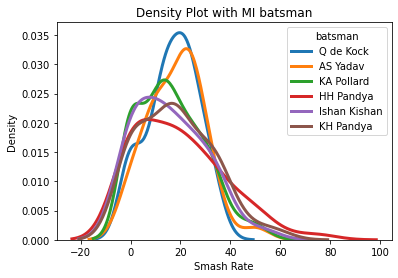

In [18]:
# List of 6 MI batsman who are playing today
MI_batsman = ['Q de Kock', 'AS Yadav','KA Pollard', 'HH Pandya','Ishan Kishan','KH Pandya']

# Iterate through the 6 MI batsman
for batsman in MI_batsman:
    # Subset to the batsman
    subset = df_smash_rate[df_smash_rate['batsman'] == batsman]
    
    # Draw the density plot
    sns.distplot(subset['smash_rate'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = batsman)
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'batsman')
plt.title('Density Plot with MI batsman')
plt.xlabel('Smash Rate')
plt.ylabel('Density')

**Conclusion :-**



*   From SRH density plot i can say Warner and williomson has smash rate more than 20 will have highest density.
*   In MI batsman surya kumar and decock has highest density when smash rate is greater than 20.

So i am predicting Surya kumar or Williamson will have highest smash rate in today match.



### Q4) Which bowler will have highest boundar leaker metric?

Boundary leaker = 1/(no.of balls bowled by bowler)/(no.of boundaries scored of the bowler +1))

In [22]:
df_bowler = df_deliveries[(df_deliveries['bowler'] == 'Rashid Khan') | (df_deliveries['bowler'] == 'T Natarajan')|
                          (df_deliveries['bowler'] == 'S Nadeem') | (df_deliveries['bowler'] == 'S Sharma') |
                          (df_deliveries['bowler'] == 'TA Boult') | (df_deliveries['bowler'] == 'JJ Bumrah') |
                          (df_deliveries['bowler'] == 'KH Pandya') | (df_deliveries['bowler'] == 'RD Chahar')]

#Calculating number of balls bowled, wides,no-balls are not allocated under bowler balls.
df_balls_bowled = df_bowler[(df_bowler['wide_runs'] == 0) & (df_bowler['noball_runs'] == 0)]
df_balls_bowled = df_balls_bowled.groupby(['match_id','bowler'],as_index=False)['ball'].count()
df_balls_bowled.rename(columns={'ball':'balls_bowled'},inplace=True) 

#Calcualting no.of boundaries scored off the bowler in each match
df_boundary = df_bowler[(df_bowler['batsman_runs'] == 4) | (df_bowler['batsman_runs'] == 6)]
df_boundary = df_boundary.groupby(['match_id','bowler'],as_index=False)['batsman_runs'].count()
df_boundary.rename(columns={'batsman_runs':'no_of_boundaries_given'}, inplace=True)


In [23]:
#Now merging above noth dataframes
df_BL = pd.merge(df_balls_bowled, df_boundary, how= 'left', left_on=['match_id','bowler'],right_on=['match_id','bowler'])
df_BL['no_of_boundaries_given'].fillna(0, inplace=True)

#Now calculating BL
df_BL['boundary_leaker'] = (1 / (df_BL['balls_bowled'] / (df_BL['no_of_boundaries_given'] +1)))
df_BL.head()

,match_id,bowler,balls_bowled,no_of_boundaries_given,boundary_leaker
0,1,Rashid Khan,24,5.0,0.250000
1,2,JJ Bumrah,24,3.0,0.166667
2,2,KH Pandya,12,2.0,0.250000
3,3,TA Boult,24,8.0,0.375000
4,4,RD Chahar,24,3.0,0.166667


In [24]:
#Taking central tendency of each bowler
df_BL.groupby('bowler',as_index=False)['boundary_leaker'].mean()

,bowler,boundary_leaker
0,JJ Bumrah,0.198190
1,KH Pandya,0.194108
2,RD Chahar,0.193519
3,Rashid Khan,0.168076
4,S Nadeem,0.197648
5,S Sharma,0.202899
6,T Natarajan,0.329861
7,TA Boult,0.257997


**Conclusion :-**



*   Here i  am dividing x value with 1. i.e 1/x. So in my solution who has the less values in 'boundary_leaker column' that bowler will have the best BL metric. 
*   Rashid khan has the least value, So he has best avearage Boundary Leaker metric.

So i am predicting in today match also rashid will have best BL metric.



### Q5) How many wickets will fall total during the match?

In [25]:
df_SRHMI = df_deliveries[(df_deliveries['batting_team'] == 'Sunrisers Hyderabad') & (df_deliveries['bowling_team'] == 'Mumbai Indians') |
                         (df_deliveries['batting_team'] == 'Mumbai Indians') & (df_deliveries['bowling_team'] == 'Sunrisers Hyderabad')] 

df_wickets = df_SRHMI[df_SRHMI['player_dismissed'] != 'No Wicket']
df_wickets = df_wickets.groupby('match_id',as_index=False)['player_dismissed'].count()
df_wickets.rename(columns={'player_dismissed':'Number_of_wickets'}, inplace=True)
df_wickets.head()


,match_id,Number_of_wickets
0,10,14
1,47,10
2,423,7
3,444,7
4,477,12


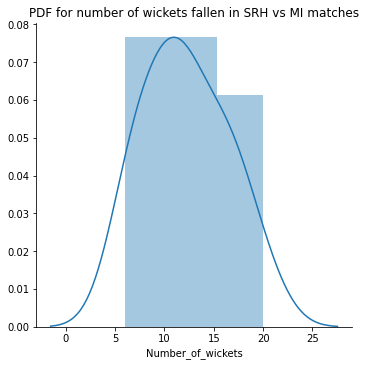

In [27]:
#Now plotting PDF 
sns.FacetGrid(df_wickets,size=5) \
   .map(sns.distplot, "Number_of_wickets") \
   .add_legend();

plt.title("PDF for number of wickets fallen in SRH vs MI matches")
plt.show();


**Conclusion :-**



*   Probability is very high for wickets 9 to 11. I think the mean value is also almost equal to 10.
*  So i am predicting in today match they will loose 10 wickets.

